gofasta vs amanual mutation calling

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
hu1_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/mutations.tsv'
hu1_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/mutations.tsv'

ba1_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA1/mutations.tsv'
ba1_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/NC_045512.2_BA.1_mutations.tsv'


ba2_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA2/mutations.tsv'
ba2_manual_path = '/home/eleanor124/projects/bjorn_rep/output/Hu1/NC_045512.2_BA.2_mutations.tsv'


pb2_mut_path = '/home/eleanor124/projects/bjorn_rep/data/PB2-DMS/PB2_mut.tsv'
pb2_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/gofasta/mutations.tsv'
pb2_manual_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/mutations.tsv'

cy_gofasta_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/gofasta/CY/mutations.tsv'
cy_manual_path = '/home/eleanor124/projects/bjorn_rep/output/PB2/CY018884.1_cds_ABM21959.1_1_mutations.tsv'


In [2]:
ambiguous_nuc = ['R', 'Y', 'W', 'S', 'K', 'M', 'B', 'D', 'H', 'V', 'N']

In [3]:
def process(path):
    df = pd.read_csv(path, sep="\t")
    df = (
        df[["sra", "region", "pos", "ref", "alt"]]
        .drop_duplicates()
        .sort_values(by=["sra", "pos"])
        .reset_index(drop=True)
    )

    return df


In [4]:
def corr_plt(gofasta, manual, title):

    gofasta1 = (
        gofasta.groupby("sra")["pos"]
        .nunique()
        .reset_index(name="pos_count_standard")
    )

    manual2 = (
        manual[~manual["alt"].str.upper().isin(ambiguous_nuc)]
        .groupby("sra")["pos"]
        .nunique()
        .reset_index(name="pos_count_manual")
    )
    
    merged2 = pd.merge(gofasta1, manual2, on='sra', how="outer").fillna(0)

    plt.scatter(merged2['pos_count_manual'], merged2['pos_count_standard'], color='lightblue')
    minv = min(merged2['pos_count_manual'])
    maxv = max(merged2['pos_count_manual'])
    
    plt.plot([minv, maxv], [minv, maxv], 'r--', label='y = x')
    plt.legend(loc='upper right')
    plt.xlabel("pos count - our mutation calling")
    plt.ylabel("pos count - standard")
    plt.title(f"Number of mutations in each position, excluding ambiguous nuc for ALT - {title}")
    plt.tight_layout()
    plt.show()

    return merged2[merged2['pos_count_standard'] != merged2['pos_count_manual']]


## Hu1-BA

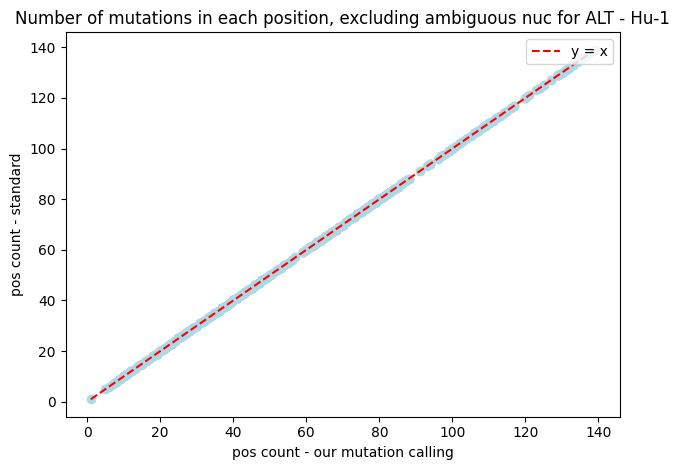

,sra,pos_count_standard,pos_count_manual,gap


In [9]:
hu1_gofasta = process(hu1_gofasta_path)
hu1_manual = process(hu1_manual_path)

pos_mismatch = corr_plt(hu1_gofasta, hu1_manual, "Hu-1")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [8]:
tmp1 = hu1_gofasta.loc[(hu1_gofasta["sra"] == 'hCoV-19/USA/CA-SEARCH-143126/2025') & (~hu1_gofasta["alt"].isin(ambiguous_nuc)), :]
tmp2 = hu1_manual.loc[(hu1_manual["sra"] == 'hCoV-19/USA/CA-SEARCH-143126/2025') & (~hu1_manual["alt"].isin(ambiguous_nuc)), :]
m = pd.merge(tmp1, tmp2, on=["sra", "pos"], how="outer", indicator=True)
m[m["_merge"] != "both"]

,sra,region_x,pos,ref_x,alt_x,region_y,ref_y,alt_y,_merge
64,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,22599,G,C,NaN,NaN,NaN,left_only
65,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,22629,A,C,NaN,NaN,NaN,left_only
66,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,22674,C,T,NaN,NaN,NaN,left_only
67,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,22679,T,C,NaN,NaN,NaN,left_only
68,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,22686,C,T,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
131,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,28881,G,A,NaN,NaN,NaN,left_only
132,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,28882,G,A,NaN,NaN,NaN,left_only
133,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,28883,G,C,NaN,NaN,NaN,left_only
134,hCoV-19/USA/CA-SEARCH-143126/2025,NC_045512.2,28958,C,A,NaN,NaN,NaN,left_only


In [ ]:
tmp1 = hu1_gofasta.loc[hu1_gofasta["sra"] == "hCoV-19/USA/CA-SEARCH-63567/2021", ]
tmp2 = hu1_manual.loc[(hu1_manual["sra"] == "hCoV-19/USA/CA-SEARCH-63567/2021") & (hu1_manual["alt"] != 'N'), ]
pd.merge(tmp1, tmp2, how="outer", on=['sra', 'pos'])

In [ ]:
ba1_gofasta = process(ba1_gofasta_path)
ba1_manual = process(ba1_manual_path)

pos_mismatch = corr_plt(ba1_gofasta, ba1_manual, "BA1")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [ ]:
tmp1 = ba1_gofasta[(ba1_gofasta["sra"] == "hCoV-19/USA/CA-SEARCH-140651/2024") & (~ba1_gofasta["alt"].isin(ambiguous_nuc))]
tmp2 = ba1_manual[(ba1_manual["sra"] == 'hCoV-19/USA/CA-SEARCH-140651/2024') & (~ba1_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", on=["pos"], indicator=True)
m[m["_merge"] != "both"]

In [ ]:
tmp1 = ba1_gofasta[(ba1_gofasta["sra"] == "hCoV-19/USA/CA-SEARCH-233687/2024") & (~ba1_gofasta["alt"].isin(ambiguous_nuc))]
tmp2 = ba1_manual[(ba1_manual["sra"] == 'hCoV-19/USA/CA-SEARCH-233687/2024') & (~ba1_manual["alt"].isin(ambiguous_nuc))]
m = pd.merge(tmp1, tmp2, how="outer", on=["pos"], indicator=True)
m[m["_merge"] != "both"]

In [ ]:
ba2_gofasta = process(ba2_gofasta_path)
ba2_manual = process(ba2_manual_path)

pos_mismatch = corr_plt(ba2_gofasta, ba2_manual, "BA2")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [ ]:
tmp2 = ba2_manual[(ba2_manual["sra"] == 'hCoV-19/USA/STM-0007062-B10/2021') & (~ba2_manual["alt"].isin(ambiguous_nuc))]
tmp2

In [ ]:
tmp1 = ba1_manual.loc[ba1_manual["sra"] == "hCoV-19/Iraq/KR-SEARCH-119907/2021", ]
tmp2 = ba1_gofasta.loc[ba1_gofasta["sra"] == "hCoV-19/Iraq/KR-SEARCH-119907/2021", ]
m = pd.merge(tmp1, tmp2, on=["sra", "pos"], how="outer", indicator=True)
m[(m["_merge"]== "left_only")&(~m["alt_x"].isin(ambiguous_nuc))]

In [ ]:
tmp1 = ba1_gofasta.loc[ba1_gofasta["sra"] == "hCoV-19/Iraq/KR-SEARCH-118872/2021", ]
tmp2 = ba1_manual.loc[(ba1_manual["sra"] == "hCoV-19/Iraq/KR-SEARCH-118872/2021") & (ba1_manual["alt"] != 'N'), ]
merged_tmp = pd.merge(tmp1, tmp2, how="outer", on=['sra', 'pos'], indicator=True)
merged_tmp.loc[merged_tmp["_merge"] == 'left_only', :]

In [ ]:
corr_plt(ba2_gofasta, ba2_manual, "BA2")

In [ ]:
df1 = pd.read_csv('/home/eleanor124/projects/bjorn_rep/output/Hu1/mutations.tsv', sep="\t", header=0)
df1.sort_values(by=["sra", "pos"]).reset_index(drop=True, inplace=True)

df2 = pd.read_csv('/home/eleanor124/projects/bjorn_rep/output/Hu1/gofasta/BA1/mutations.tsv', sep="\t", header=0)
df2.sort_values(by=["sra", "pos"]).reset_index(drop=True, inplace=True)

df2

## PB2 - DMS

In [ ]:
pb2_gofasta = process(pb2_gofasta_path)
pb2_gofasta["sra"] = pb2_gofasta["sra"].apply(lambda x: x.split('_')[1])
pb2_mut = process(pb2_mut_path)


pb2_manual= process(pb2_manual_path)
pb2_manual["sra"] = pb2_manual["sra"].apply(lambda x: x.split('_')[1])



In [ ]:
pb2_mut["sra"].nunique()

In [ ]:
pb2_manual["sra"].nunique()

In [ ]:
pos_mismatch = corr_plt(pb2_mut, pb2_manual, "PB2")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)

In [ ]:
pos_mismatch = corr_plt(pb2_gofasta, pb2_manual, "PB2")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)
pos_mismatch

In [ ]:
cy_manual = process(cy_manual_path)
cy_manual["sra"] = cy_manual["sra"].apply(lambda x: x.split('_')[1])
cy_gofasta = process(cy_gofasta_path)
cy_gofasta["sra"] = cy_gofasta["sra"].apply(lambda x: x.split('_')[1])

pos_mismatch = corr_plt(cy_gofasta, cy_manual, "CY")
pos_mismatch["gap"] = pos_mismatch["pos_count_manual"] - pos_mismatch["pos_count_standard"]
pos_mismatch.sort_values(by=["gap"], ascending=False)
pos_mismatch